<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

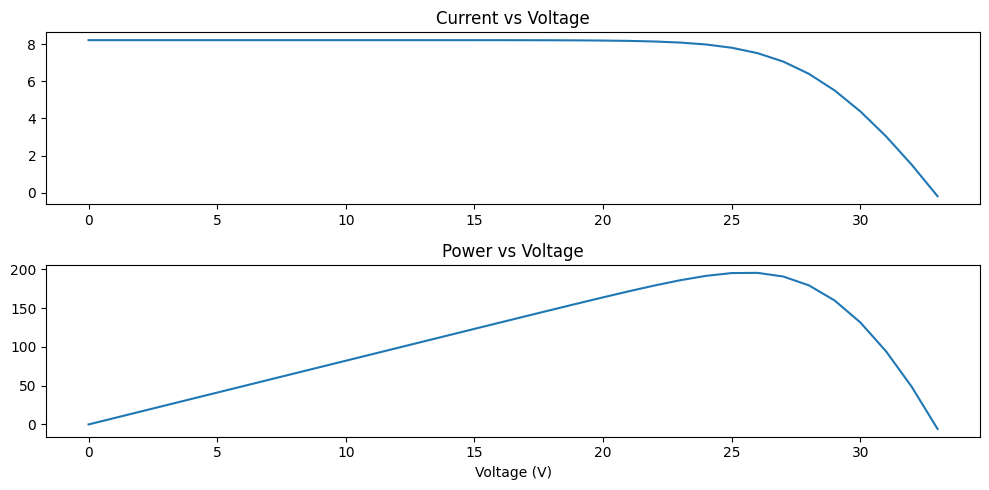

In [12]:
#example 2.1
import numpy as np
import matplotlib.pyplot as plt

def PV_model(Va, Suns, TaC):
    # Constants
    k = 1.38e-23  # Boltzmann’s constant
    q = 1.60e-19  # charge on an electron
    A = 1.2       # diode quality factor
    Vg = 1.12     # band gap voltage in eV
    Ns = 54       # number of series-connected cells

    # Temperatures in Kelvin
    T1 = 273 + 25
    T2 = 273 + 75
    TaK = 273 + TaC

    # Voltage and current values at T1 and T2
    Voc_T1 = 32.9 / Ns
    Isc_T1 = 8.21
    Voc_T2 = 29.9 / Ns
    Isc_T2 = 6.62

    # Light-generated current Iph
    Iph_T1 = Isc_T1 * Suns
    a = (Isc_T2 - Isc_T1) / Isc_T1 / (T2 - T1)
    Iph = Iph_T1 * (1 + a * (TaK - T1))


    Vt_T1 = k * T1 / q
    Ir_T1 = Isc_T1 / (np.exp(Voc_T1 / (A * Vt_T1)) - 1)
    Ir_T2 = Isc_T2 / (np.exp(Voc_T2 / (A * Vt_T1)) - 1)
    b = Vg * q / (A * k)
    Ir = Ir_T1 * (TaK / T1) ** (3 / A) * np.exp(-b * (1 / TaK - 1 / T1))

    # Series resistance Rs
    X2v = Ir_T1 / (A * Vt_T1) * np.exp(Voc_T1 / (A * Vt_T1))
    dVdI_Voc = -1.15 / Ns / 2
    Rs = -dVdI_Voc - 1 / X2v

    # Thermal voltage at Ta
    Vt_Ta = A * k * TaK / q
    Vc = Va / Ns
    Ia = np.zeros_like(Vc)

    # Newton-Raphson method
    for _ in range(5):
        exp_term = np.exp((Vc + Ia * Rs) / Vt_Ta)
        Ia = Ia - (Iph - Ia - Ir * (exp_term - 1)) / (-1 - Ir * exp_term * Rs / Vt_Ta)

    return Ia

# Usage
Suns = 1
TaC = 25
Va = np.arange(0, 34, 1)  # 0 to 33V
Ia = PV_model(Va, Suns, TaC)
P = Va * Ia

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(Va, Ia)
plt.title('Current vs Voltage')

plt.subplot(2, 1, 2)
plt.plot(Va, P)
plt.title('Power vs Voltage')
plt.xlabel('Voltage (V)')
plt.tight_layout()
plt.show()
